Advanced Descriptive Statistics and Statistical Tests Using the Wine Dataset in Python

In this continuation of our tutorial, we will further explore the Wine dataset by applying statistical tests (e.g., ANOVA) and preparing the data for predictive modeling. 

We will also explore additional features and their relationships with the target variable.

We will use Python libraries such as pandas, numpy, scipy, statsmodels, matplotlib, and seaborn for this analysis.

Import Libraries

First, let's import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

Load the Wine Dataset

The Wine dataset is available in the scikit-learn library. Let's load it and convert it into a pandas DataFrame.

In [2]:
# Load the Wine dataset
wine = load_wine()

# Convert to pandas DataFrame
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Add the target column to the DataFrame
df['target'] = wine.target

# Display the first few rows of the dataset
print(df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

Explore Additional Features

Let's explore some additional features and their relationships with the target variable.

Total Phenols

Total phenols are chemical compounds that contribute to the taste and color of wine. 

Let's analyze their distribution and relationship with the target variable.

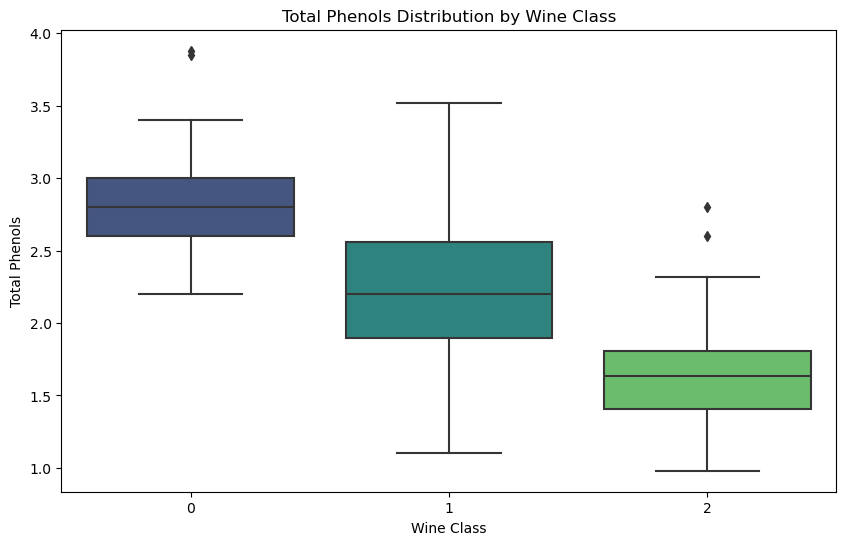

In [3]:
# Plot total phenols distribution by wine class
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='total_phenols', data=df, palette='viridis')
plt.title('Total Phenols Distribution by Wine Class')
plt.xlabel('Wine Class')
plt.ylabel('Total Phenols')
plt.show()

C:\Users\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


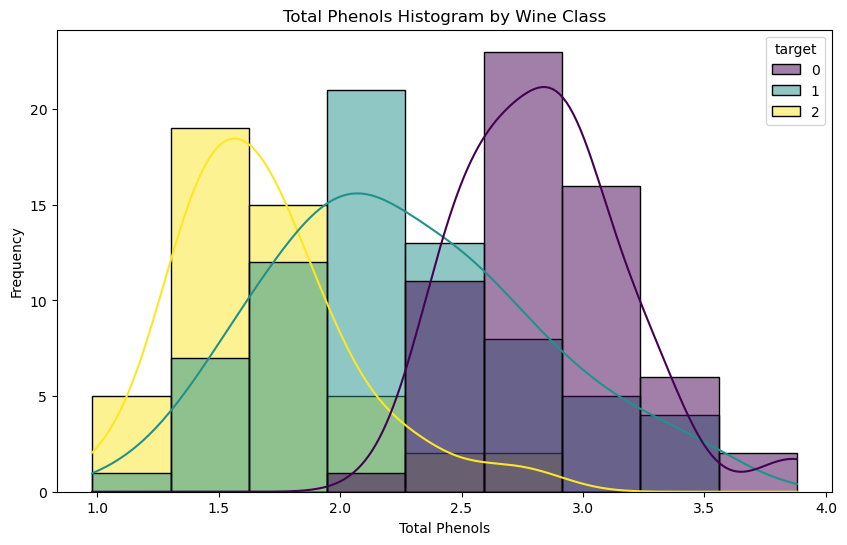

In [4]:
# Plot total phenols histogram for each wine class
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='total_phenols', hue='target', kde=True, palette='viridis')
plt.title('Total Phenols Histogram by Wine Class')
plt.xlabel('Total Phenols')
plt.ylabel('Frequency')
plt.show()

Color Intensity

Color intensity is another important feature. Let's analyze its distribution and relationship with the target variable.

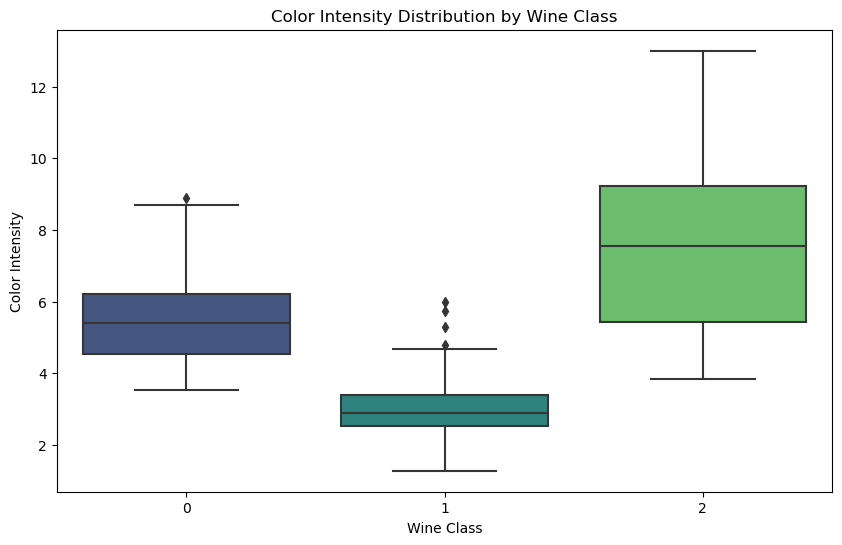

In [5]:
# Plot color intensity distribution by wine class
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='color_intensity', data=df, palette='viridis')
plt.title('Color Intensity Distribution by Wine Class')
plt.xlabel('Wine Class')
plt.ylabel('Color Intensity')
plt.show()

C:\Users\Personal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


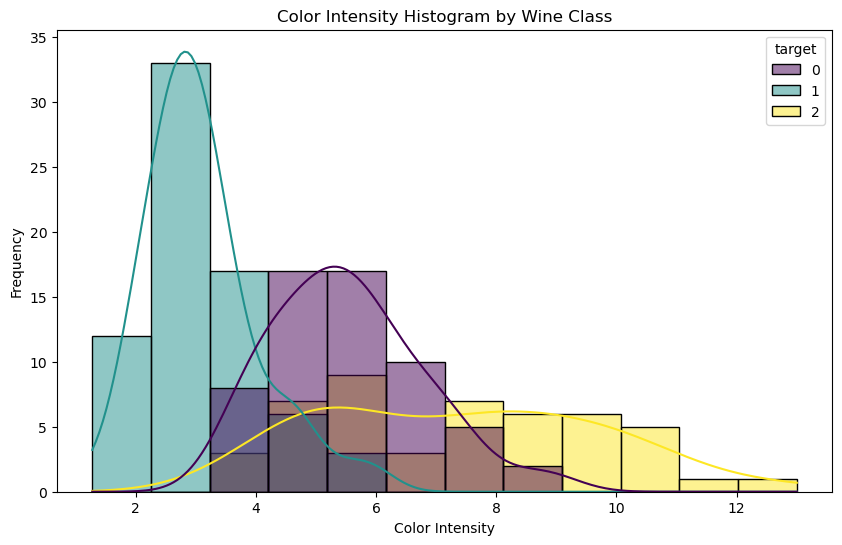

In [6]:
# Plot color intensity histogram for each wine class
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='color_intensity', hue='target', kde=True, palette='viridis')
plt.title('Color Intensity Histogram by Wine Class')
plt.xlabel('Color Intensity')
plt.ylabel('Frequency')
plt.show()

Apply Statistical Tests

Statistical tests help us determine if there are significant differences between groups or relationships between variables.

ANOVA (Analysis of Variance)

ANOVA is used to compare the means of three or more groups. 

Let's use ANOVA to test if there are significant differences in alcohol content across the wine classes.

In [7]:
# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(
    df[df['target'] == 0]['alcohol'],
    df[df['target'] == 1]['alcohol'],
    df[df['target'] == 2]['alcohol']
)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in alcohol content among the wine classes.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in alcohol content among the wine classes.")

F-statistic: 135.07762424279912, P-value: 3.319503795619655e-36
Reject the null hypothesis: There is a significant difference in alcohol content among the wine classes.


Chi-Square Test for Categorical Data

The chi-square test is used to determine if there is a significant association between two categorical variables. 

Let's test if the wine class is independent of a binned version of alcohol content.

Create Bins for Alcohol Content

In [8]:
# Create bins for alcohol content
df['alcohol_bin'] = pd.cut(df['alcohol'], bins=3, labels=['Low', 'Medium', 'High'])

Perform Chi-Square Test

In [9]:
# Create a contingency table
contingency_table = pd.crosstab(df['target'], df['alcohol_bin'])

# Perform the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square Statistic: {chi2_stat}, P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between wine class and alcohol content.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between wine class and alcohol content.")

Chi-square Statistic: 98.85900654714656, P-value: 1.7207753472322594e-20
Reject the null hypothesis: There is a significant association between wine class and alcohol content.
